# Logistic Function

In [ ]:
import numpy as np
import pandas as pd

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

theta = np.arange(-10, 10, 0.05)
y = 1 / (1 + np.exp(-1 * theta))

pd.DataFrame(
    {
        'theta': theta,
        'y': y
    }
).plot(
    title='Logistic Function', 
    kind='scatter', x='theta', y='y', 
    ax=ax
)

ax.set_yticks(np.arange(0, 1.25, step=0.5))

fig.show()

# Iris 

In [41]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [42]:
# It's customary to call a data frame, df
df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = pd.Series(
    iris.target
)

In [43]:
df.sample(n=3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
16,5.4,3.9,1.3,0.4,0
149,5.9,3.0,5.1,1.8,2
115,6.4,3.2,5.3,2.3,2


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'], cv=num_folds, scoring=['accuracy'])

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror),
    )
)

Logistic Regression: Accuracy (6-fold): 0.95 ~ 1.00


In [46]:
from sklearn.preprocessing import MinMaxScaler

coef_sign = lambda c: '+' if c >= 0 else '-'

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

mms = MinMaxScaler()
x_train_scaled = mms.fit_transform(df[iris.feature_names])

clf.fit(x_train_scaled, df['target'])

for i, (intercept, coefs) in enumerate(zip(clf.intercept_, clf.coef_)):
    print(f'Class {i}: Intercept = {intercept} & Coefficients = {coefs}')

Class 0: Intercept = 2.203697707000198 & Coefficients = [-1.40492627  1.56002082 -2.86063347 -2.78713597]
Class 1: Intercept = 1.2291506893341533 & Coefficients = [ 0.26135757 -1.43723031  0.41839556 -0.47843834]
Class 2: Intercept = -3.432848396334338 & Coefficients = [ 1.1435687  -0.12279052  2.44223791  3.2655743 ]


In [48]:
df_coef = pd.DataFrame(
    {
        f'Coef [Class {class_id}]': clf.coef_[class_id]
        for class_id in range(clf.coef_.shape[0])
    },
    index=iris.feature_names
)

df_coef.loc['intercept', :] = clf.intercept_
df_coef

,Coef [Class 0],Coef [Class 1],Coef [Class 2]
sepal length (cm),-1.404926,0.261358,1.143569
sepal width (cm),1.560021,-1.437230,-0.122791
petal length (cm),-2.860633,0.418396,2.442238
petal width (cm),-2.787136,-0.478438,3.265574
intercept,2.203698,1.229151,-3.432848


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


num_folds = 6

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'], cv=num_folds, scoring=['accuracy'])

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror),
    )
)

Logistic Regression: Accuracy (6-fold): 0.95 ~ 1.00


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

num_folds = 6

clf = DecisionTreeClassifier(max_depth=3)
accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'], cv=num_folds, scoring=['accuracy'])

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Decision Tree Classifier: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror),
    )
)

Decision Tree Classifier: Accuracy (6-fold): 0.93 ~ 0.99


In [40]:
# http://www.cse.chalmers.se/~richajo/dit866/lectures/l3/Plotting%20decision%20boundaries.html

def plot_decision_boundary(clf, x, y, ax, title):
    
    cmap='Paired_r'
    
    feature_names = x.columns
    x, y = x.values, y.values
    
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    
    step = 0.02
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
    ax.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=22)

x_train = df_test[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


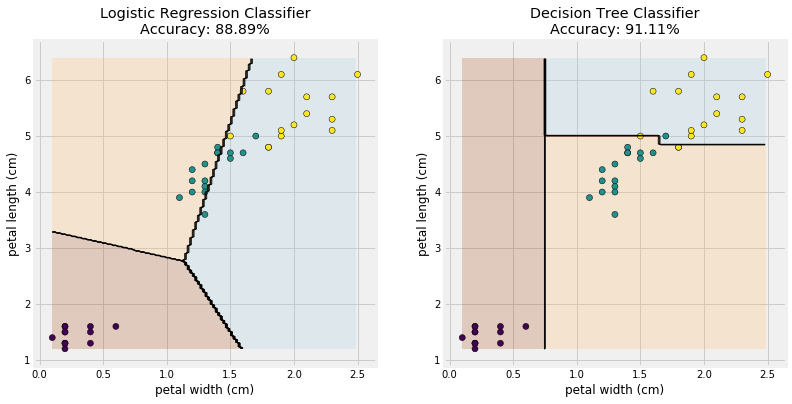

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

two_features = ['petal width (cm)', 'petal length (cm)']


clf_lr = LogisticRegression()
clf_lr.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'], 
    clf_lr.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_lr, df_test[two_features], df_test['target'], ax=axs[0], 
    title=f'Logistic Regression Classifier\nAccuracy: {accuracy:.2%}'
)

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'], 
    clf_dt.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_dt, df_test[two_features], df_test['target'], ax=axs[1], 
    title=f'Decision Tree Classifier\nAccuracy: {accuracy:.2%}'
)

fig.show()

In [10]:
coef_sign = lambda c: '+' if c >= 0 else '-'

for i, coef_pair in enumerate(clf_lr.coef_):
    print(
        'Class {class_id} Boundary: {intercept} {coef0} {coef1}'.format(
            class_id=i,
            intercept=f'{clf_lr.intercept_[i]:.2}',
            coef0=f'{coef_sign(coef_pair[0])} {abs(coef_pair[0]):.2} * {two_features[0]}',
            coef1=f'{coef_sign(coef_pair[1])} {abs(coef_pair[1]):.2} * {two_features[1]}',
        )
    )

Class 0 Boundary: 3.5 - 1.6 * petal width (cm) - 1.0 * petal length (cm)
Class 1 Boundary: -1.6 - 0.84 * petal width (cm) + 0.5 * petal length (cm)
Class 2 Boundary: -3.7 + 2.1 * petal width (cm) + 0.063 * petal length (cm)
